In [ ]:
#Importing the necessary libraries
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [ ]:
#Reading the data file
df = pd.read_csv("/content/DS1_C5_S5_Hotel Dataset.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [ ]:
#task1:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape) #returns a tuple with the details number of rows and columns
print(df.columns) # returns array of columns in dataset
df.info()       # returns the information about the dataset
df.isnull().sum()       # isnull returns the True/False dataframe
#to separate data types
def separate_data_types(df):
  categorical = []
  numerical  = []
  for col in df.columns:
    if df[col].nunique() < 100:
      categorical.append(col)
    else:
      numerical.append(col)
  return categorical,numerical

categorical, numerical = separate_data_types(df)

table = [categorical,numerical]
print(tabulate({"Categorical":categorical,
                "numerical":numerical},headers = ["Categorical","numerical"]))
# Identify non-numeric values in numerical columns
for col in numerical:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting non-convertible values to NaN

# Fill missing numerical values with the mean
for col in numerical:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with the mode
for col in categorical:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for any remaining null values
print(df.isnull().sum().sum())  # Should return 0 if all missing values have been handled
#Final inspection
print(df.info())
print(df.describe())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0         68               2015               July   
1  Resort Hotel            0         14               2015               July   
2  Resort Hotel            0         10               2015               July   
3  Resort Hotel            0          9               2015               July   
4  Resort Hotel            0         51               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          2   
2                        27                          3   
3                        27                          3   
4                        28                          6   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     4       2  ...    No Deposit   
1     

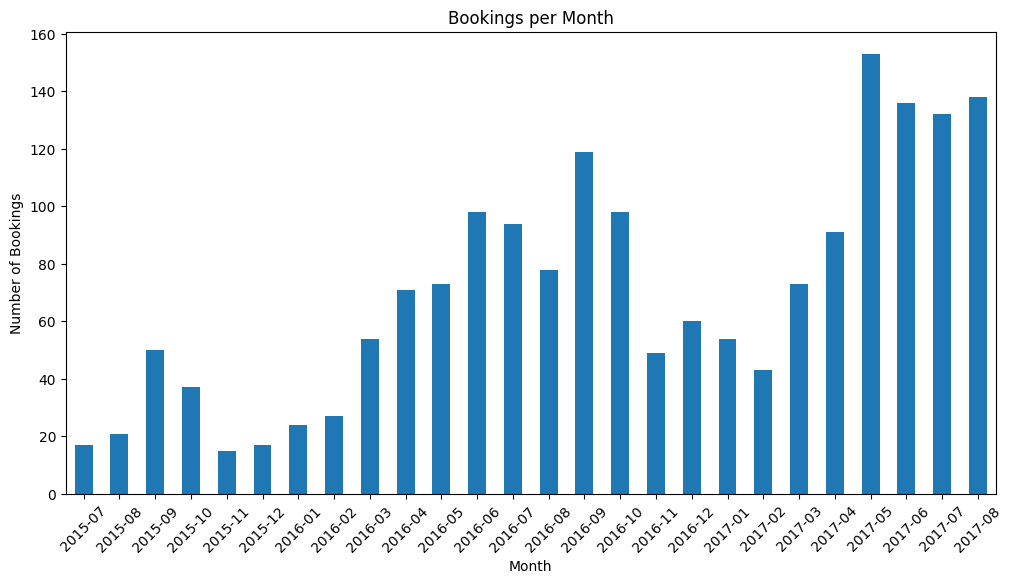

In [ ]:
#Task2.1:

df['booking_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-01')
bookings_per_month = df.groupby(df['booking_date'].dt.to_period("M")).size()

# Plotting
bookings_per_month.plot(kind='bar', figsize=(12, 6), title='Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Interpretation:In 2017 may month number of bookings is near to 150

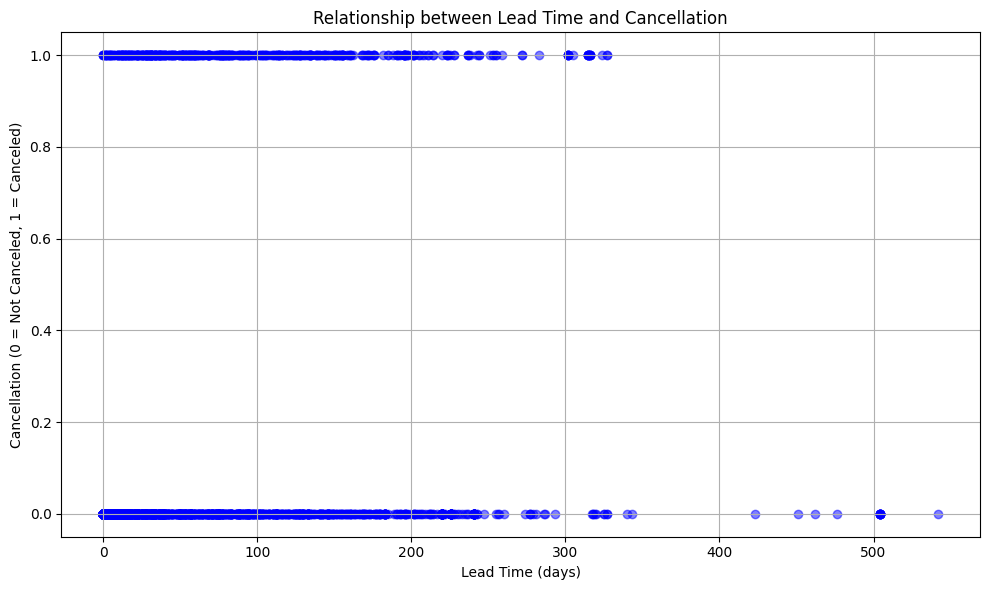

In [ ]:
#task2.2:
# Ensure 'is_canceled' is numeric (if it's not already)
df['is_canceled'] = df['is_canceled'].astype(int)
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['lead_time'], df['is_canceled'], alpha=0.5, color='blue')
plt.title('Relationship between Lead Time and Cancellation')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation (0 = Not Canceled, 1 = Canceled)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Interprretation:Here this scattor plot shows no relationship between leadtime and cancellation

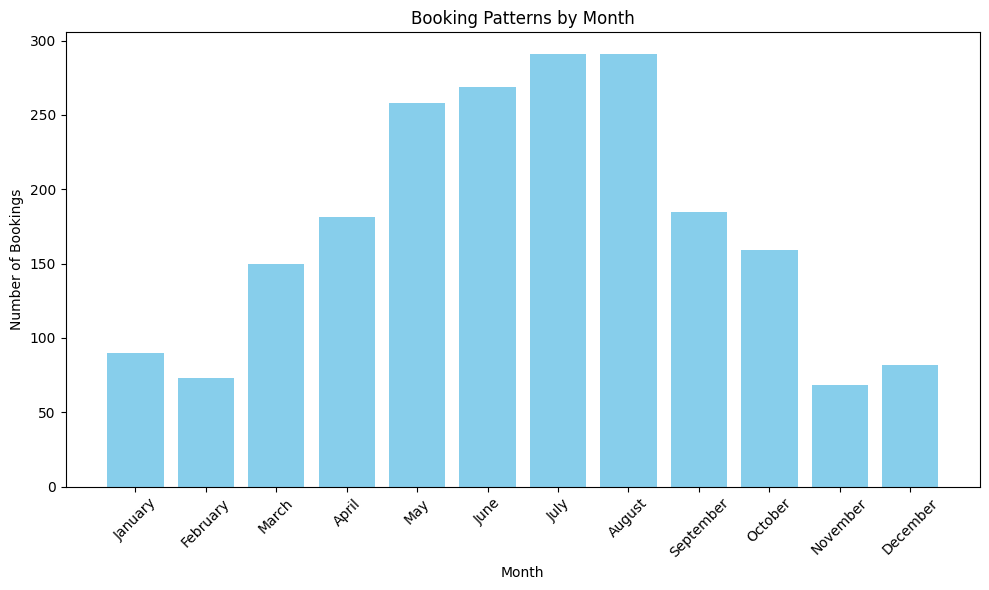

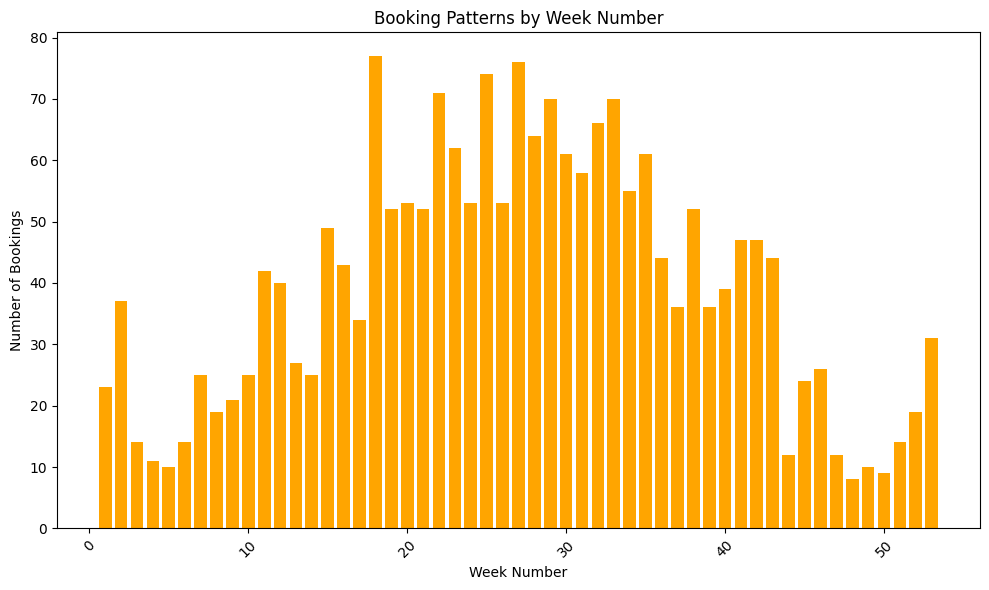

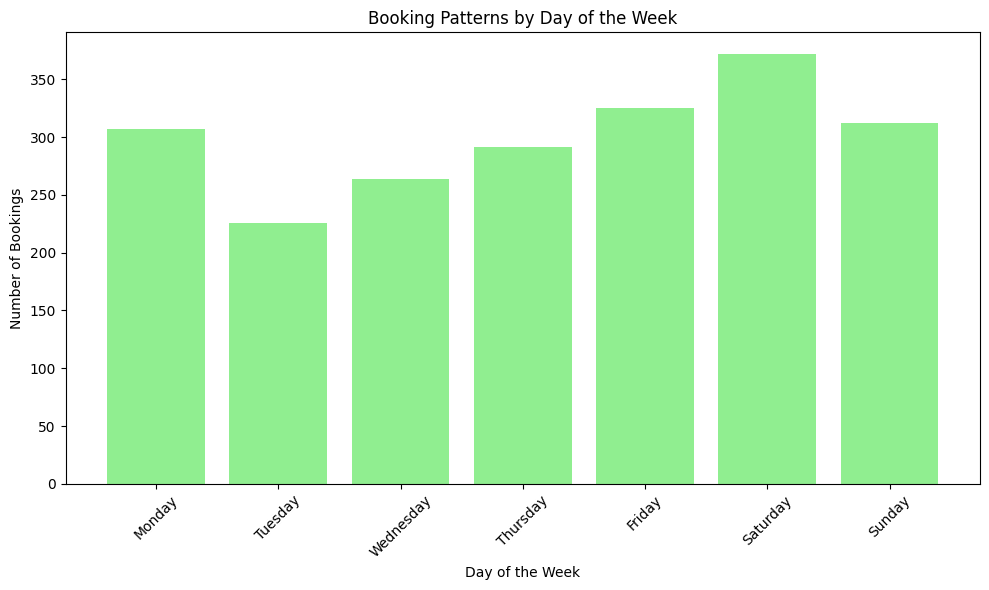

In [ ]:
#task2.3:
# Create a datetime column if you haven't already
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str))
# Group by arrival_date_month
month_counts = df.groupby('arrival_date_month').size().reset_index(name='counts')

# Sort by month order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
month_counts['arrival_date_month'] = pd.Categorical(month_counts['arrival_date_month'], categories=months_order, ordered=True)
month_counts = month_counts.sort_values('arrival_date_month')
# Bar graph for months
plt.figure(figsize=(10, 6))
plt.bar(month_counts['arrival_date_month'], month_counts['counts'], color='skyblue')
plt.title('Booking Patterns by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Group by arrival_date_week_number
week_counts = df.groupby('arrival_date_week_number').size().reset_index(name='counts')
# Sort weeks
week_counts.sort_values('arrival_date_week_number', inplace=True)
# Bar graph for weeks
plt.figure(figsize=(10, 6))
plt.bar(week_counts['arrival_date_week_number'], week_counts['counts'], color='orange')
plt.title('Booking Patterns by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Create a new column for the day of the week
df['arrival_day_of_week'] = df['arrival_date'].dt.day_name()

# Group by arrival_day_of_week
day_counts = df.groupby('arrival_day_of_week').size().reset_index(name='counts')

# Sort days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts['arrival_day_of_week'] = pd.Categorical(day_counts['arrival_day_of_week'], categories=days_order, ordered=True)
day_counts = day_counts.sort_values('arrival_day_of_week')
# Bar graph for days of the week
plt.figure(figsize=(10, 6))
plt.bar(day_counts['arrival_day_of_week'], day_counts['counts'], color='lightgreen')
plt.title('Booking Patterns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Interpretation:month wise booking patterns are high in the month of july and august.week number wise booking patternsare high in 19th week...day of the week wise booking patterns are high in saturday...

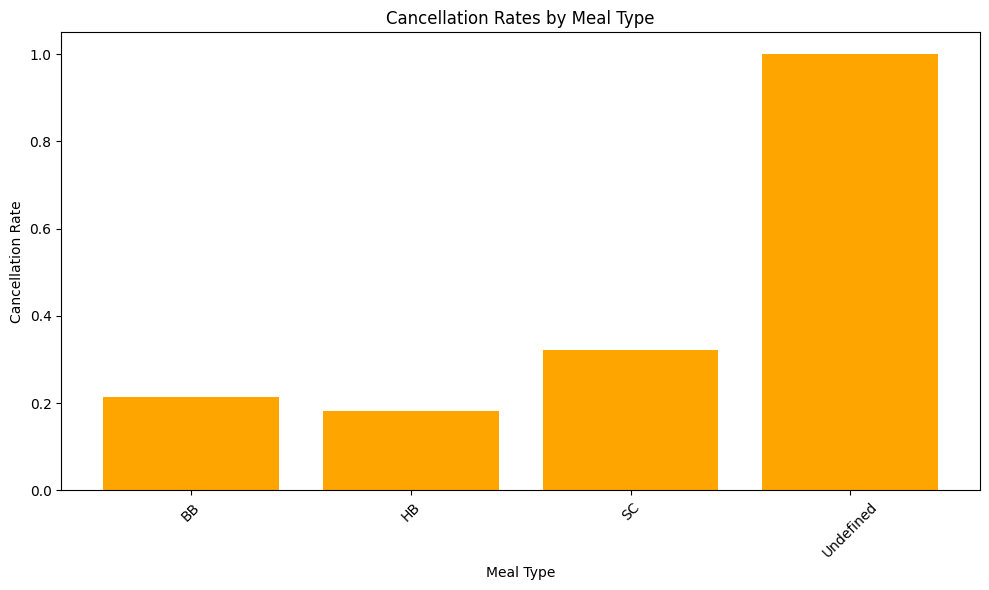

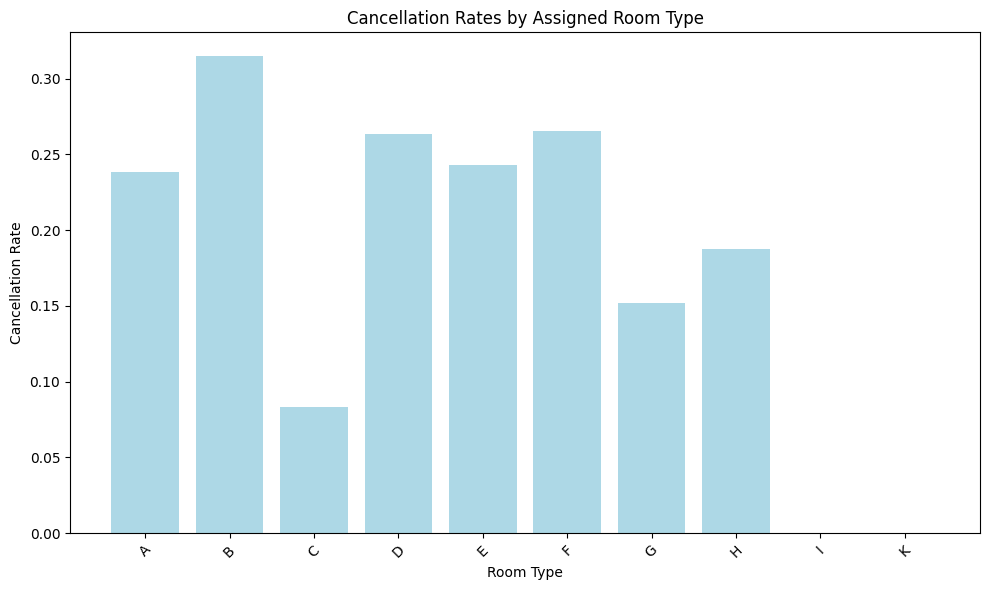

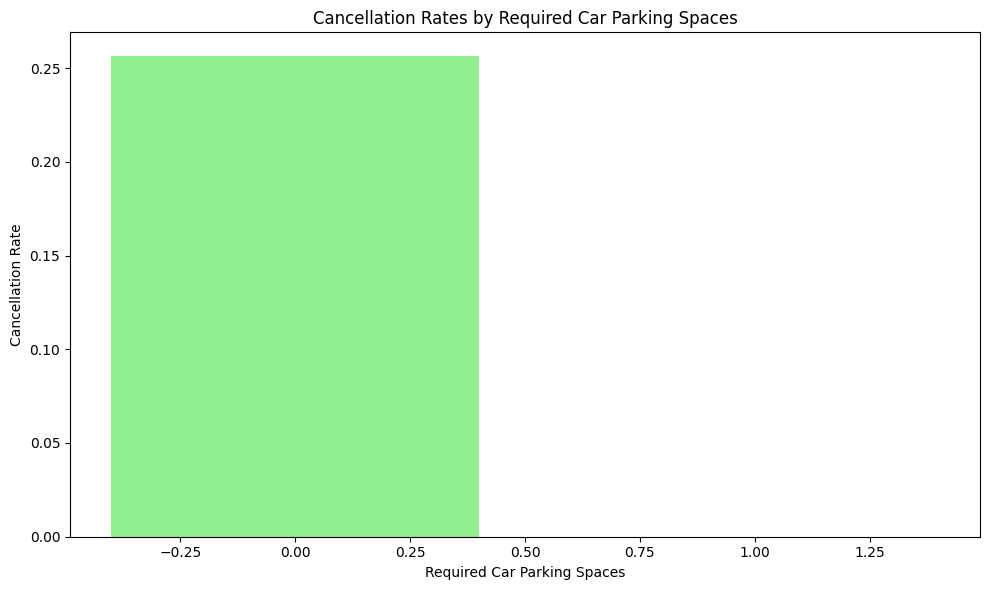

In [ ]:
#Task3.1:
#Analyze Cancellation Patterns Based on Meal
# Group by meal type
meal_cancellation = df.groupby('meal')['is_canceled'].mean().reset_index()
# Rename the column for clarity
meal_cancellation.columns = ['meal', 'cancellation_rate']
# Plotting the cancellation rates by meal
plt.figure(figsize=(10, 6))
plt.bar(meal_cancellation['meal'], meal_cancellation['cancellation_rate'], color='orange')
plt.title('Cancellation Rates by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Analyze Cancellation Patterns Based on Assigned Room Type
# Group by assigned room type
room_cancellation = df.groupby('assigned_room_type')['is_canceled'].mean().reset_index()
# Rename the column for clarity
room_cancellation.columns = ['room_type', 'cancellation_rate']
# Plotting the cancellation rates by room type
plt.figure(figsize=(10, 6))
plt.bar(room_cancellation['room_type'], room_cancellation['cancellation_rate'], color='lightblue')
plt.title('Cancellation Rates by Assigned Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Analyze Cancellation Patterns Based on Required Car Parking Spaces
# Group by required car parking spaces
parking_cancellation = df.groupby('required_car_parking_spaces')['is_canceled'].mean().reset_index()
# Rename the column for clarity
parking_cancellation.columns = ['parking_spaces', 'cancellation_rate']
# Plotting the cancellation rates by required parking spaces
plt.figure(figsize=(10, 6))
plt.bar(parking_cancellation['parking_spaces'], parking_cancellation['cancellation_rate'], color='lightgreen')
plt.title('Cancellation Rates by Required Car Parking Spaces')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#interpretation:The cancellation rate for Undefined meal type is significantly higher than the others, indicating that bookings with unspecified meal preferences are more likely to be canceled.
#room type B has many cancellations compare with other room types... There is only one bar in the chart, indicating that there is only one category for required car parking space.. The bar is tall, reaching approximately 0.25 on the y-axis, indicating a relatively high cancellation rate for bookings that require car parking spaces.
#meal type,room type,car parking spaces these factors are influence by booking patterns

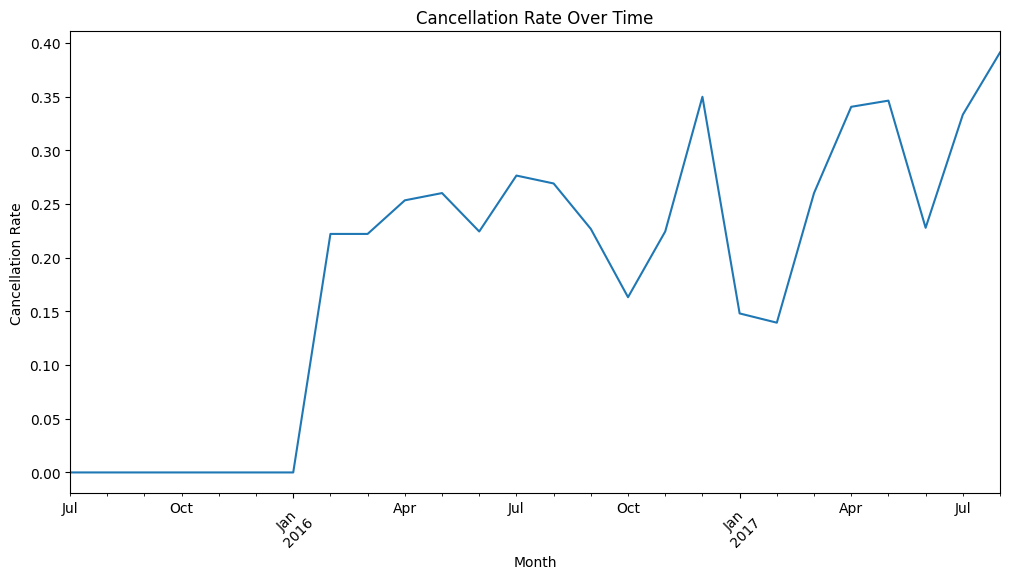

In [ ]:
#task3.2:Trends or Patterns in Cancellation Over Time
# Monthly cancellations
monthly_cancellations = df.groupby(df['booking_date'].dt.to_period("M"))['is_canceled'].mean()

# Plotting
monthly_cancellations.plot(kind='line', figsize=(12, 6), title='Cancellation Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Interpretation:There is a general upward trend in cancellation rates over the time period, with a significant spike occurring between April and July 2017.
#The graph also shows some seasonal patterns. Cancellation rates tend to be higher in the summer months (July and August) and lower in the winter months (December, January, and February).
#There are a few notable peaks in the cancellation rate, particularly around October 2016 and April 2017.

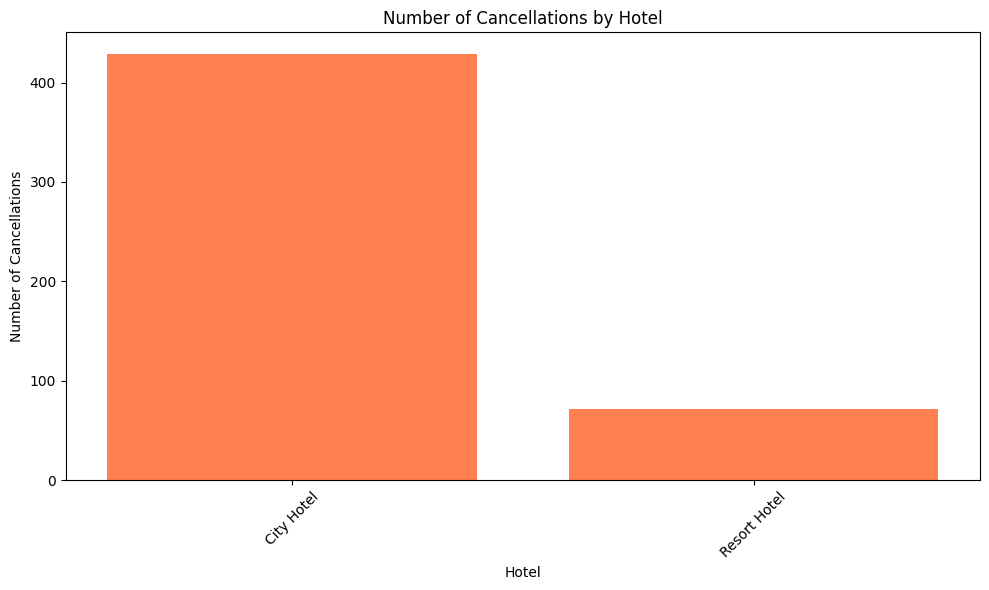

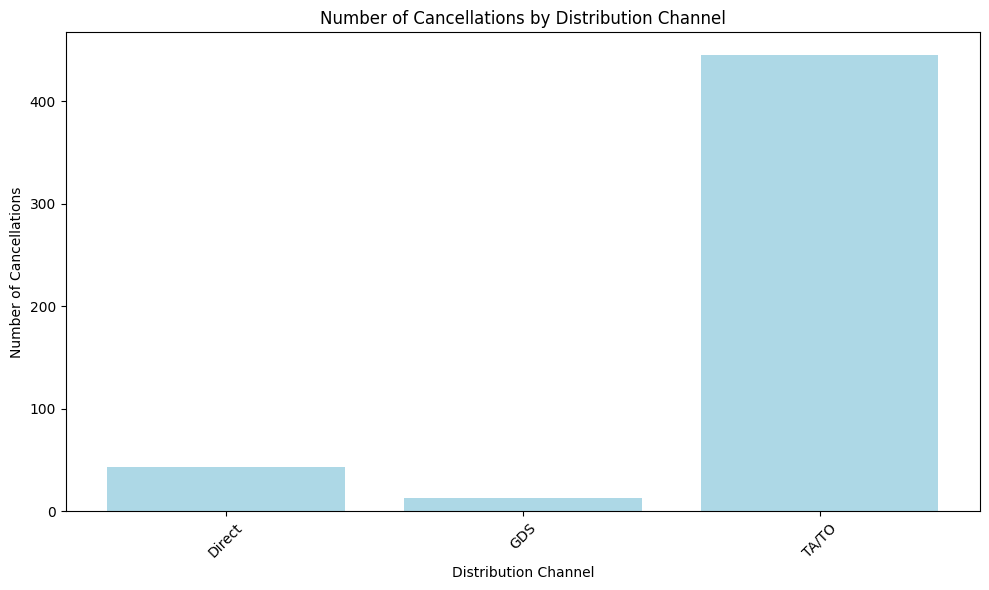

In [ ]:
#task3.3:
# Extract all canceled records
canceled_records = df[df['is_canceled'] == 1]
# Count cancellations by hotel
hotel_cancellations = canceled_records['hotel'].value_counts().reset_index()
hotel_cancellations.columns = ['hotel', 'cancellation_count']
# Bar graph for hotel cancellations
plt.figure(figsize=(10, 6))
plt.bar(hotel_cancellations['hotel'], hotel_cancellations['cancellation_count'], color='coral')
plt.title('Number of Cancellations by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Group by distribution channel and calculate cancellations
channel_cancellations = canceled_records.groupby('distribution_channel').size().reset_index(name='cancellation_count')
# Bar graph for distribution channel cancellations
plt.figure(figsize=(10, 6))
plt.bar(channel_cancellations['distribution_channel'], channel_cancellations['cancellation_count'], color='lightblue')
plt.title('Number of Cancellations by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#interpretation:City Hotel has a significantly higher number of cancellations compared to Resort Hotel.The specific numbers of cancellations are:City Hotel: Approximately 400 cancellations.Resort Hotel: Approximately 100 cancellations.
#TA/TO (Travel Agent/Tour Operator) has the highest number of cancellations, followed by Direct bookings.GDS (Global Distribution System) has the lowest number of cancellations.
#The specific numbers of cancellations are:
#TA/TO: Approximately 450 cancellations.
#Direct: Approximately 50 cancellations.
#GDS: Approximately 20 cancellations.

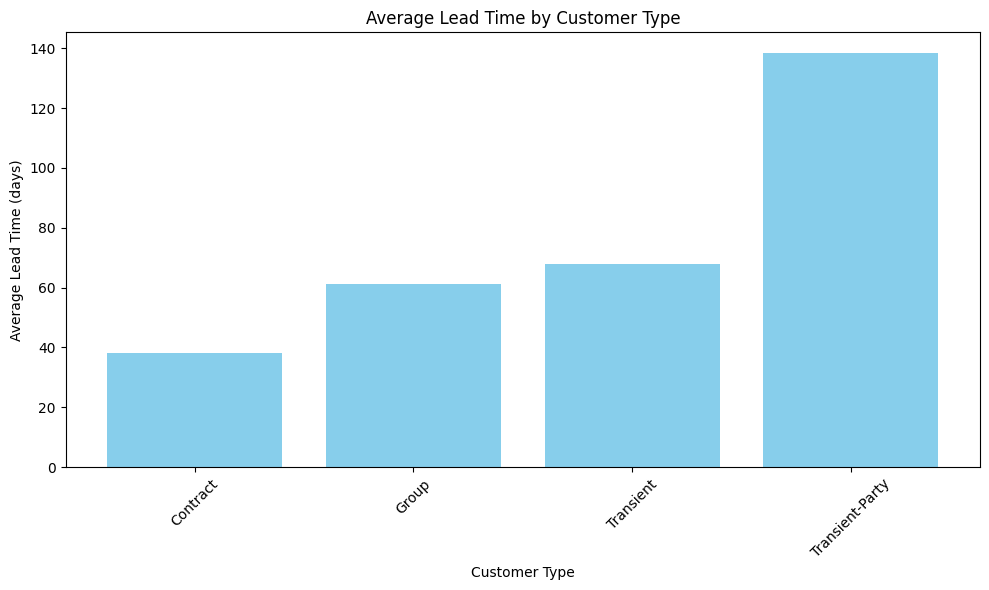

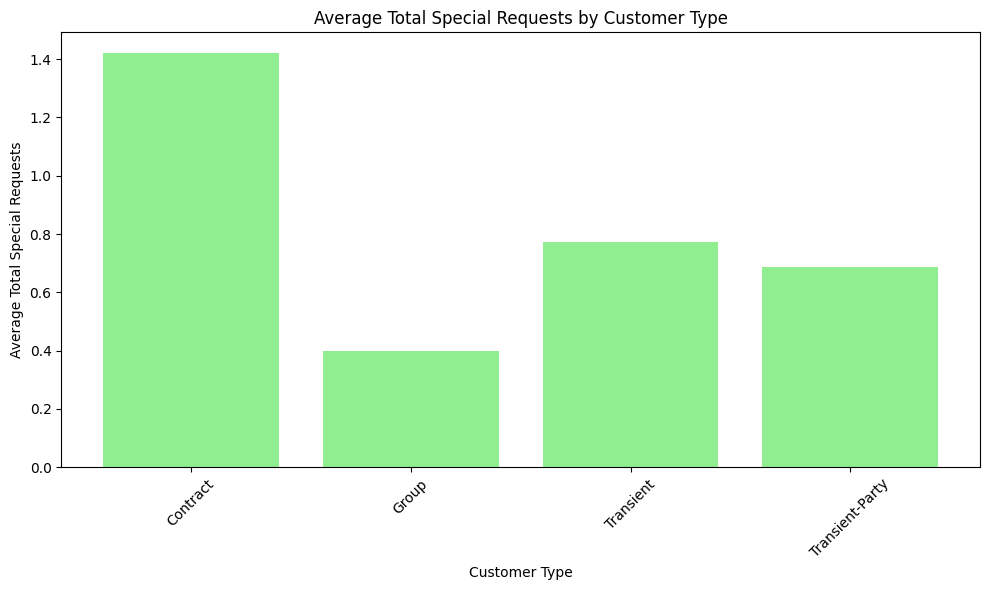

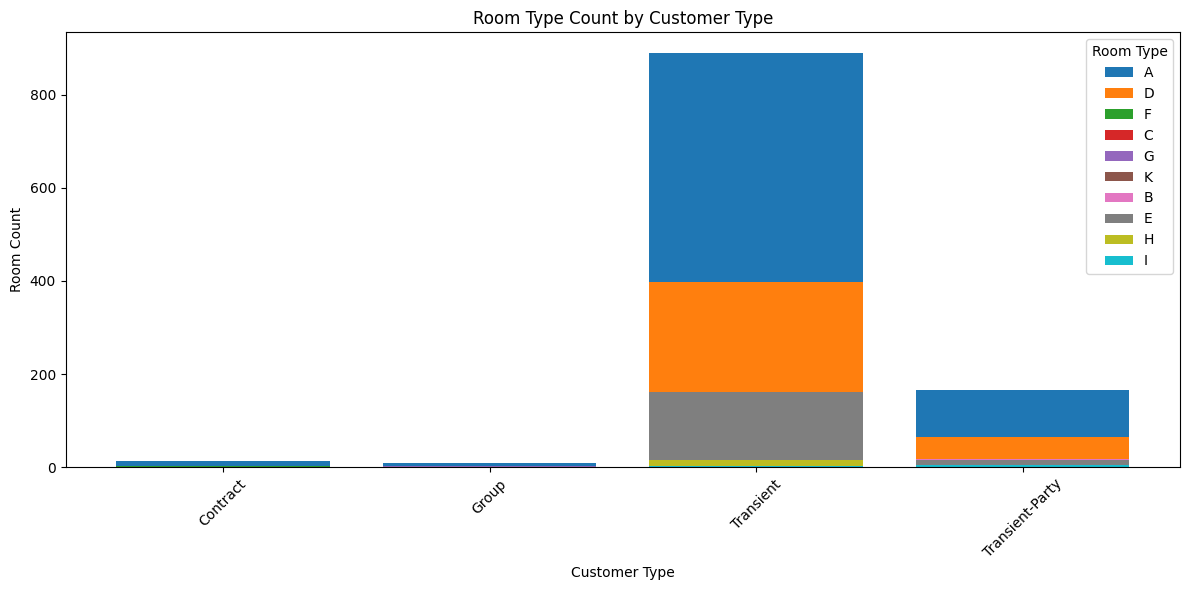

In [ ]:
#task4.1:
# Group by customer type to calculate average lead time and total special requests
customer_analysis = df.groupby('customer_type').agg(
    avg_lead_time=('lead_time', 'mean'),
    avg_special_requests=('total_of_special_requests', 'mean'),
    room_type_count=('assigned_room_type', lambda x: x.value_counts().count())
).reset_index()
# Bar graph for average lead time by customer type
plt.figure(figsize=(10, 6))
plt.bar(customer_analysis['customer_type'], customer_analysis['avg_lead_time'], color='skyblue')
plt.title('Average Lead Time by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Bar graph for average special requests by customer type
plt.figure(figsize=(10, 6))
plt.bar(customer_analysis['customer_type'], customer_analysis['avg_special_requests'], color='lightgreen')
plt.title('Average Total Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Special Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Bar graph for room type count by customer type
room_type_counts = df.groupby(['customer_type', 'assigned_room_type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
for room_type in room_type_counts['assigned_room_type'].unique():
    subset = room_type_counts[room_type_counts['assigned_room_type'] == room_type]
    plt.bar(subset['customer_type'], subset['count'], label=room_type)

plt.title('Room Type Count by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Room Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


In [ ]:
#Interpretation:Transient-Party customers have the longest average lead time, followed by Group customers.Contract and Transient customers have relatively shorter average lead times.
#The specific average lead times are:Transient-Party: Approximately 140 days.#Group: Approximately 65 days.#Transient: Approximately 65 days.#Contract: Approximately 40 days.
#Contract customers have the highest average number of special requests, followed by Group customers.Transient and Transient-Party customers have relatively lower average numbers of special request
#Transient customers have the highest overall room count, followed by Transient-Party customers.Contract and Group customers have relatively lower room counts.Room Type A is the most popular room type across all customer types.

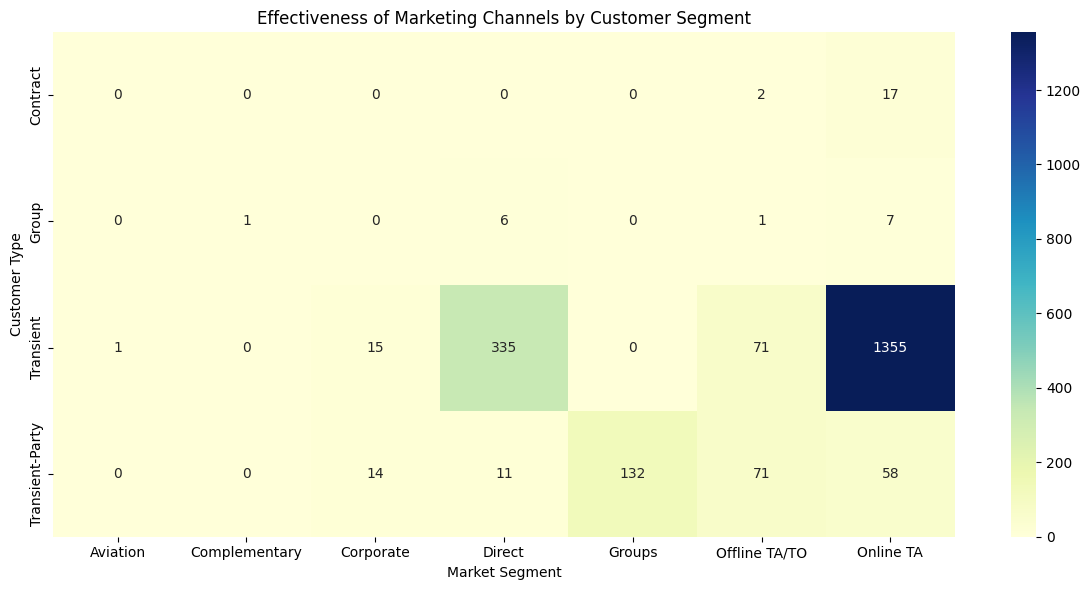

In [ ]:
#task4.2:
# Group by customer type and market segment
marketing_analysis = df.groupby(['customer_type', 'market_segment']).size().reset_index(name='booking_count')
# Create a pivot table for better visualization
pivot_table = marketing_analysis.pivot(index='customer_type', columns='market_segment', values='booking_count').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Effectiveness of Marketing Channels by Customer Segment')
plt.xlabel('Market Segment')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()

In [ ]:
#interpretation:Online TA (Online Travel Agent) is the most effective marketing channel for all customer segments, as indicated by the darkest blue cells.
#Offline TA/TO (Offline Travel Agent/Tour Operator) is generally less effective than Online TA for most customer segments.
#Direct bookings are also effective for some customer segments, but not as much as Online TA.

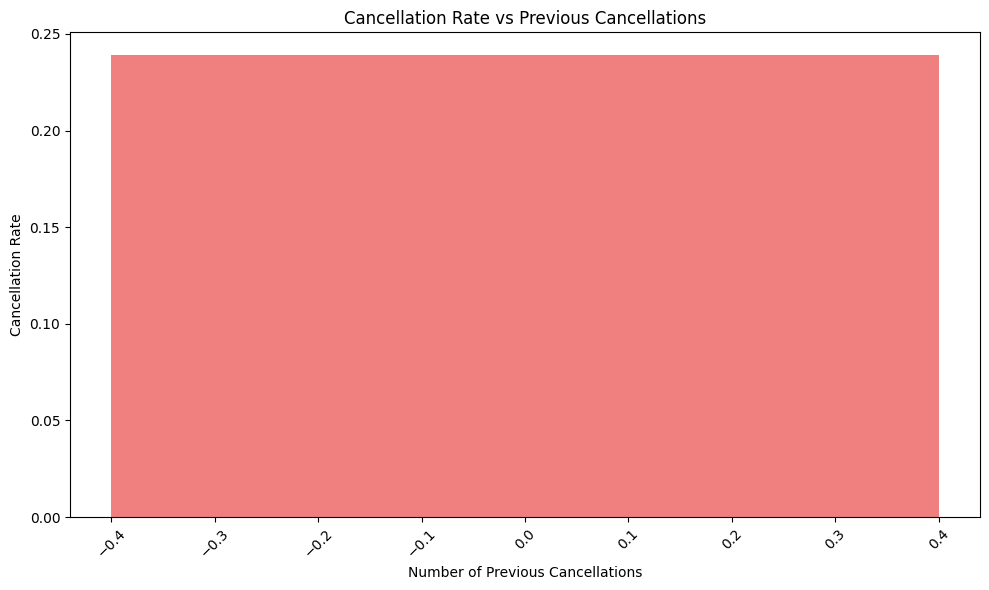

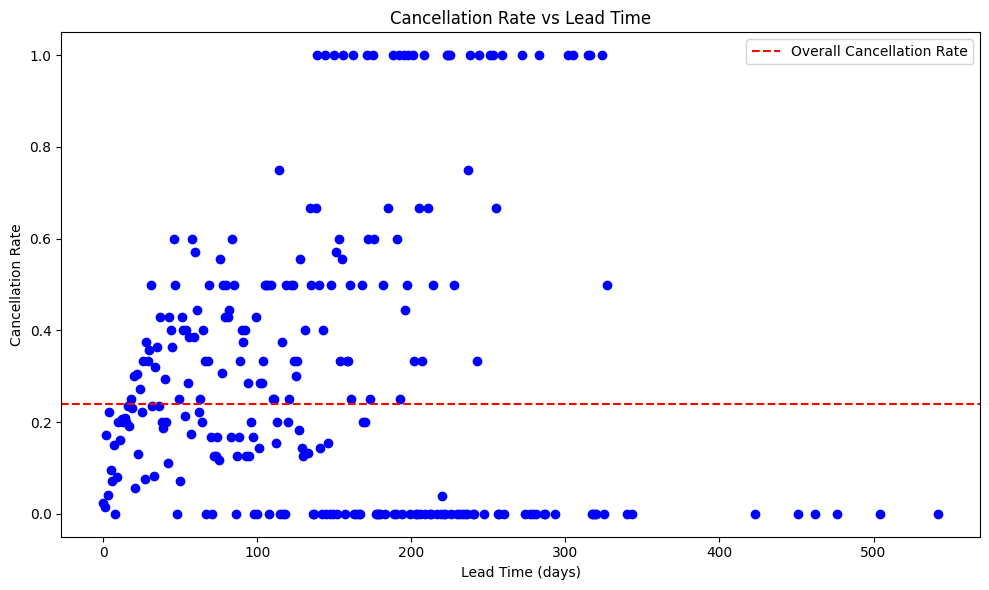

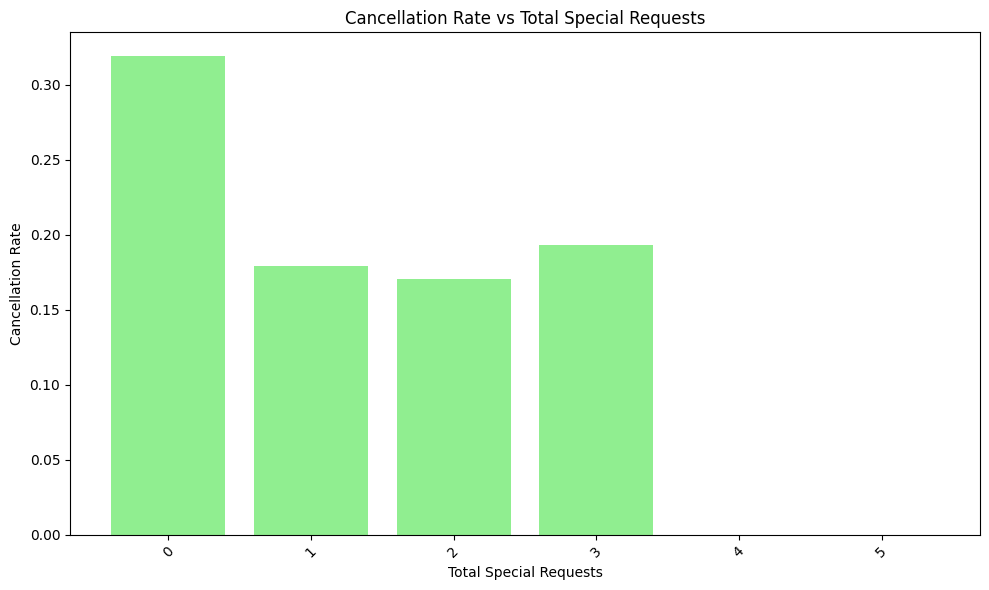

In [ ]:
#task4.3:
# Calculate overall cancellation rate
cancellation_rate = df['is_canceled'].mean()

# Step 1: Compare Cancellations vs. Previous Cancellations
previous_cancellation_analysis = df.groupby('previous_cancellations').agg(
    cancellation_count=('is_canceled', 'sum'),
    total_bookings=('is_canceled', 'size')
).reset_index()

previous_cancellation_analysis['cancellation_rate'] = previous_cancellation_analysis['cancellation_count'] / previous_cancellation_analysis['total_bookings']

# Plotting cancellations vs previous cancellations
plt.figure(figsize=(10, 6))
plt.bar(previous_cancellation_analysis['previous_cancellations'], previous_cancellation_analysis['cancellation_rate'], color='lightcoral')
plt.title('Cancellation Rate vs Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Compare Cancellations vs. Lead Time
lead_time_analysis = df.groupby('lead_time').agg(
    cancellation_count=('is_canceled', 'sum'),
    total_bookings=('is_canceled', 'size')
).reset_index()

lead_time_analysis['cancellation_rate'] = lead_time_analysis['cancellation_count'] / lead_time_analysis['total_bookings']

# Plotting cancellations vs lead time
plt.figure(figsize=(10, 6))
plt.scatter(lead_time_analysis['lead_time'], lead_time_analysis['cancellation_rate'], color='blue')
plt.title('Cancellation Rate vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')
plt.axhline(y=cancellation_rate, color='red', linestyle='--', label='Overall Cancellation Rate')
plt.legend()
plt.tight_layout()
plt.show()

# Step 3: Compare Cancellations vs. Total Special Requests
special_requests_analysis = df.groupby('total_of_special_requests').agg(
    cancellation_count=('is_canceled', 'sum'),
    total_bookings=('is_canceled', 'size')
).reset_index()

special_requests_analysis['cancellation_rate'] = special_requests_analysis['cancellation_count'] / special_requests_analysis['total_bookings']

# Plotting cancellations vs total special requests
plt.figure(figsize=(10, 6))
plt.bar(special_requests_analysis['total_of_special_requests'], special_requests_analysis['cancellation_rate'], color='lightgreen')
plt.title('Cancellation Rate vs Total Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Interpretation:Based on this limited data, it appears that there is a significant cancellation rate among guests with previous cancellation history, regardless of the specific number of previous cancellations. However, without more information about the distribution of previous cancellations among guests, it's difficult to draw definitive conclusions.
#There doesn't seem to be a clear linear relationship between lead time and cancellation rate. The data points are scattered across the plot, indicating that lead time alone might not be a strong predictor of cancellation rates.
#There appears to be a general trend of decreasing cancellation rates as the number of special requests increases. This suggests that guests who make more special requests might be less likely to cancel their bookings.

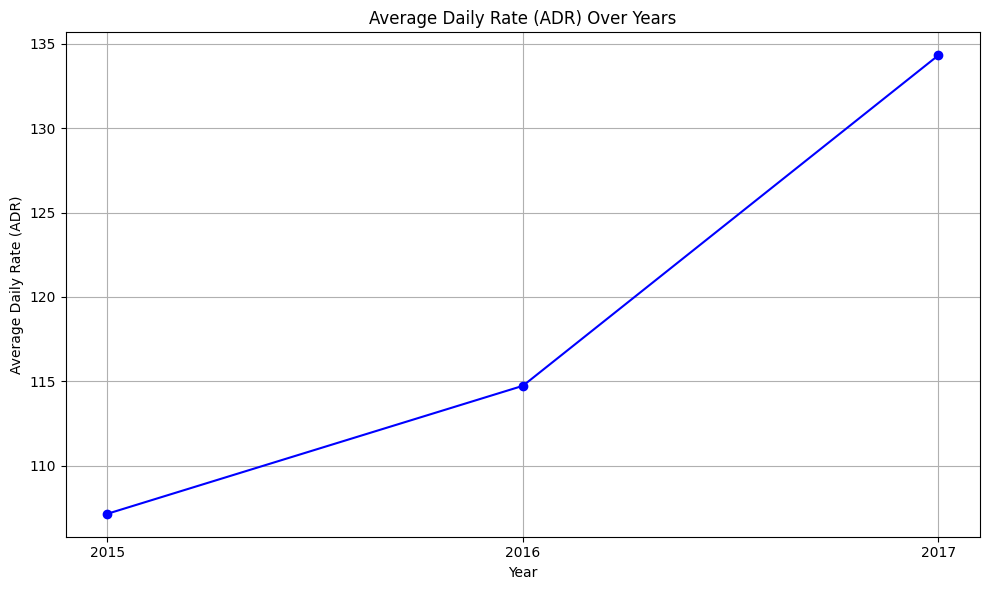

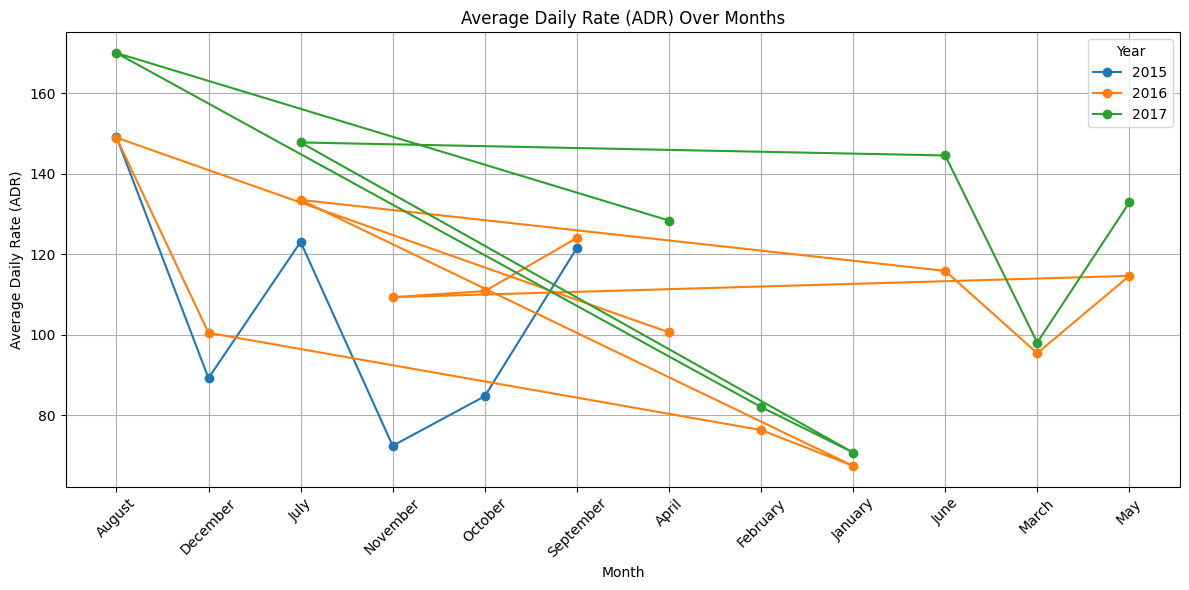

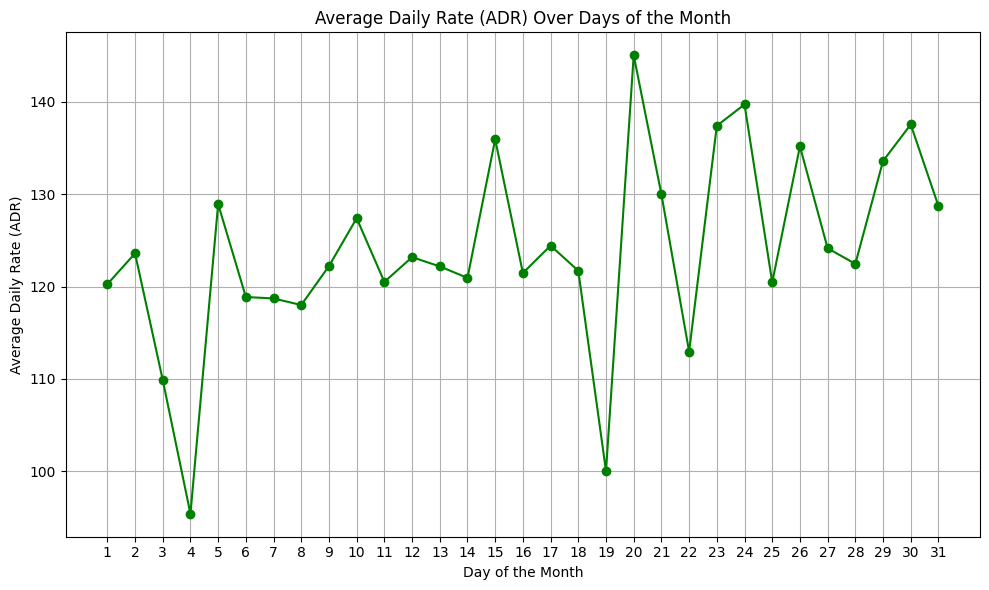

In [ ]:
#task5.1:
# Group by year and calculate average ADR
adr_by_year = df.groupby('arrival_date_year').agg(avg_adr=('adr', 'mean')).reset_index()
# Line chart for ADR by year
plt.figure(figsize=(10, 6))
plt.plot(adr_by_year['arrival_date_year'], adr_by_year['avg_adr'], marker='o', color='blue')
plt.title('Average Daily Rate (ADR) Over Years')
plt.xlabel('Year')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(adr_by_year['arrival_date_year'])
plt.grid()
plt.tight_layout()
plt.show()
# Group by month and calculate average ADR
adr_by_month = df.groupby(['arrival_date_year', 'arrival_date_month']).agg(avg_adr=('adr', 'mean')).reset_index()
# Convert month to categorical for proper ordering
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
adr_by_month['arrival_date_month'] = pd.Categorical(adr_by_month['arrival_date_month'], categories=months_order, ordered=True)

# Create line chart for ADR by month
plt.figure(figsize=(12, 6))
for year in adr_by_month['arrival_date_year'].unique():
    subset = adr_by_month[adr_by_month['arrival_date_year'] == year]
    plt.plot(subset['arrival_date_month'], subset['avg_adr'], marker='o', label=str(year))

plt.title('Average Daily Rate (ADR) Over Months')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid()
plt.tight_layout()
plt.show()
# Group by day and calculate average ADR
adr_by_day = df.groupby('arrival_date_day_of_month').agg(avg_adr=('adr', 'mean')).reset_index()
# Line chart for ADR by day
plt.figure(figsize=(10, 6))
plt.plot(adr_by_day['arrival_date_day_of_month'], adr_by_day['avg_adr'], marker='o', color='green')
plt.title('Average Daily Rate (ADR) Over Days of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(range(1, 32))  # Assuming a maximum of 31 days
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#interpretation: There is a clear upward trend in the Average Daily Rate (ADR) over the years. This indicates that the hotel has been able to increase its room rates over time.
#Peak Periods: There are a few peak periods where the ADR is significantly higher than the average. These peaks might occur during weekends, holidays, or special events.
#There is a general downward trend in the ADR over the years, especially from August to January.The ADR tends to increase from February to August, reaching a peak in August.

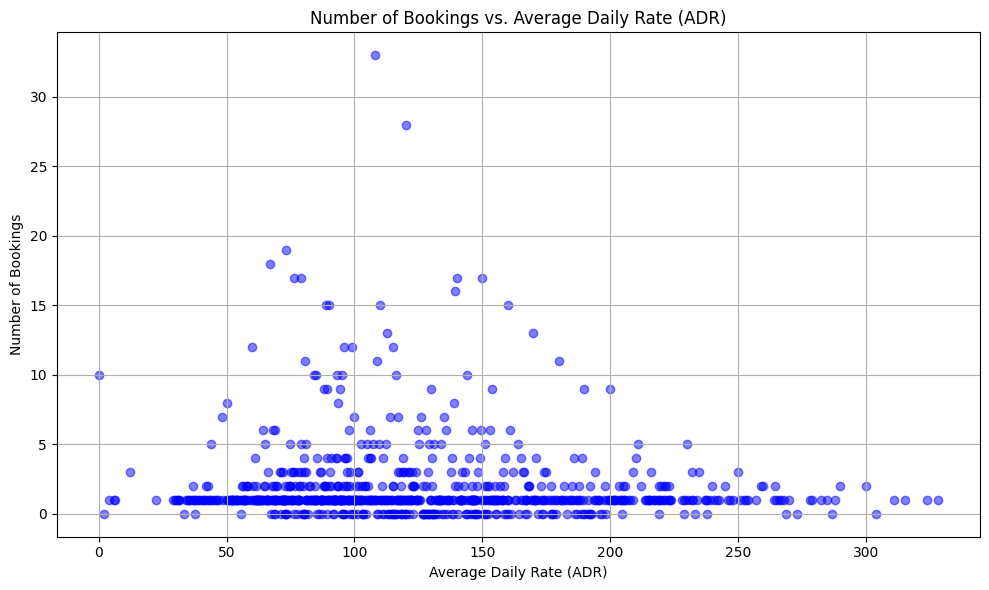

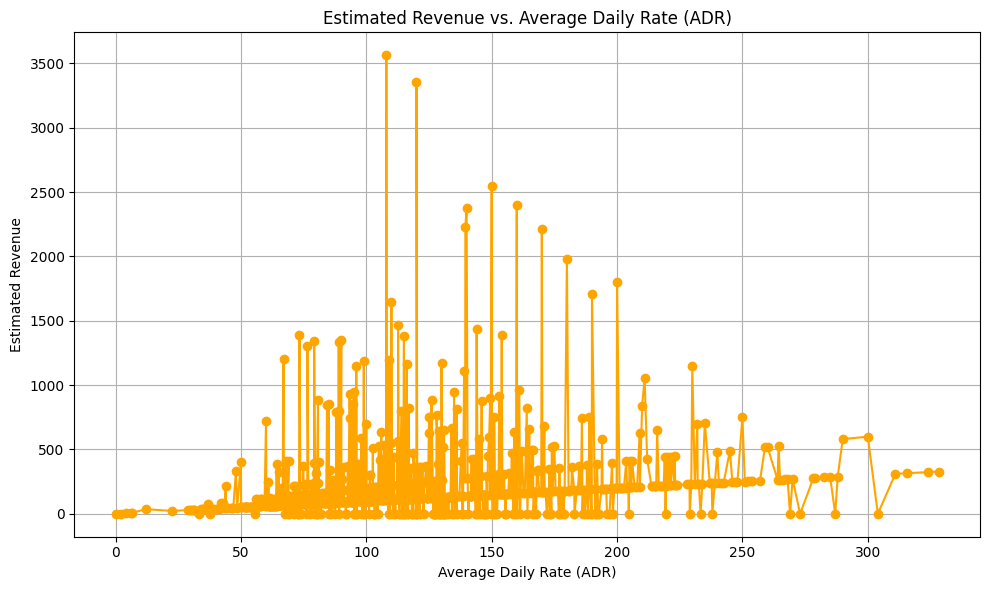

In [ ]:
#task5.2:# Group by ADR and count bookings
adr_booking_analysis = df.groupby('adr').agg(
    booking_count=('is_canceled', lambda x: (x == 0).sum())
).reset_index()
# Scatter plot for ADR vs. number of bookings
plt.figure(figsize=(10, 6))
plt.scatter(adr_booking_analysis['adr'], adr_booking_analysis['booking_count'], color='blue', alpha=0.5)
plt.title('Number of Bookings vs. Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Number of Bookings')
plt.grid()
plt.tight_layout()
plt.show()
# Calculate estimated revenue
adr_booking_analysis['estimated_revenue'] = adr_booking_analysis['adr'] * adr_booking_analysis['booking_count']
# Line plot for estimated revenue vs. ADR
plt.figure(figsize=(10, 6))
plt.plot(adr_booking_analysis['adr'], adr_booking_analysis['estimated_revenue'], marker='o', color='orange')
plt.title('Estimated Revenue vs. Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Estimated Revenue')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#interpretation:There appears to be a weak negative correlation between the number of bookings and the Average Daily Rate (ADR). This suggests that as the ADR increases, the number of bookings tends to decrease, and vice versa. However, the relationship is not very strong, as there is a significant amount of scatter in the data points.
#There appears to be a strong positive correlation between Estimated Revenue and Average Daily Rate (ADR). This suggests that as the ADR increases, the Estimated Revenue tends to increase as well.

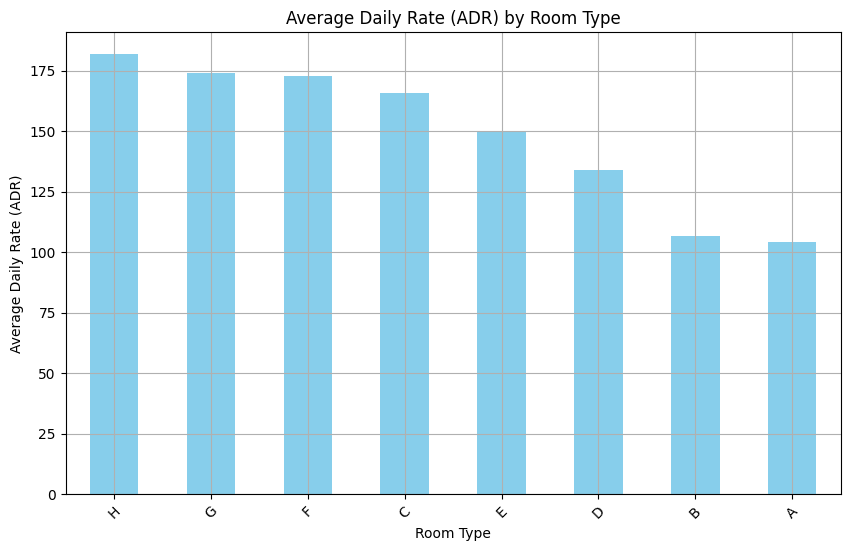

In [ ]:
#task5.3:Are There Specific Room Types Associated with Higher ADR?
# Calculate mean ADR by room type
room_type_adr = df.groupby('reserved_room_type')['adr'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
room_type_adr.plot(kind='bar', title='Average Daily Rate (ADR) by Room Type', color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
#interpreetation:H, G, F: These room types have significantly higher ADRs than the others, possibly due to their size, amenities, or location.
#C, E, Q, B, A: These room types have lower ADRs, which might be attributed to their smaller size, fewer amenities, or less desirable locations.

<ipython-input-27-538e200e57b4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distribution_channel', y='average_adr', data=channel_summary, palette='viridis')


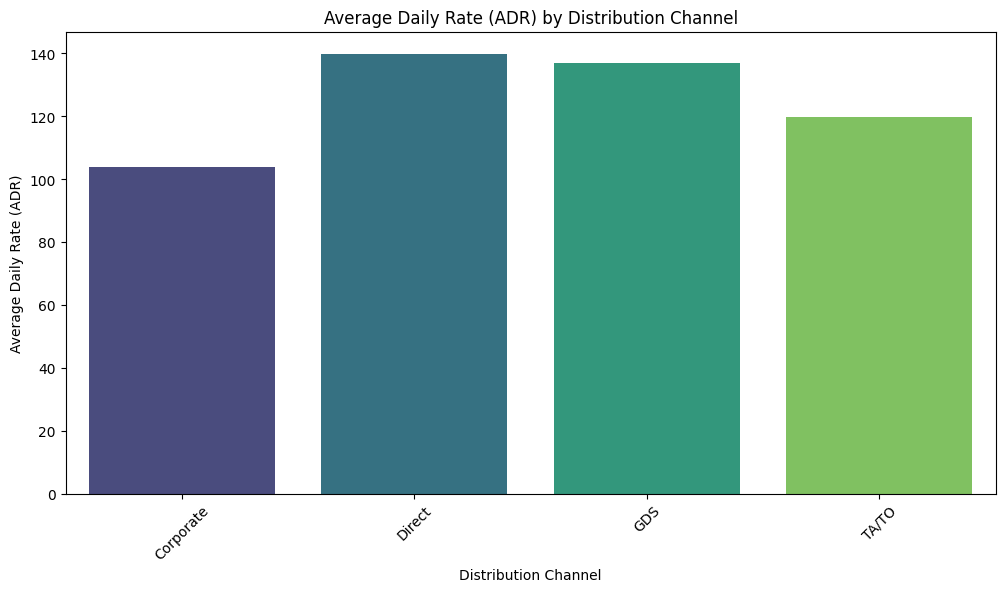

In [ ]:
#task6.1: Effectiveness of Different Booking Distribution Channels
# Calculate cancellation rates and average ADR by distribution channel
channel_summary = df.groupby('distribution_channel').agg(
    cancellation_rate=('is_canceled', 'mean'),
    average_adr=('adr', 'mean'),
    total_bookings=('is_canceled', 'count')
).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='distribution_channel', y='average_adr', data=channel_summary, palette='viridis')
plt.title('Average Daily Rate (ADR) by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#interpretation:Direct bookings command a significantly higher ADR compared to TA/TO bookings.Corporate bookings have a slightly higher ADR than Direct bookings, but the difference is not as pronounced.
#GDS (Global Distribution System) bookings have an ADR that falls between Direct and TA/TO bookings.

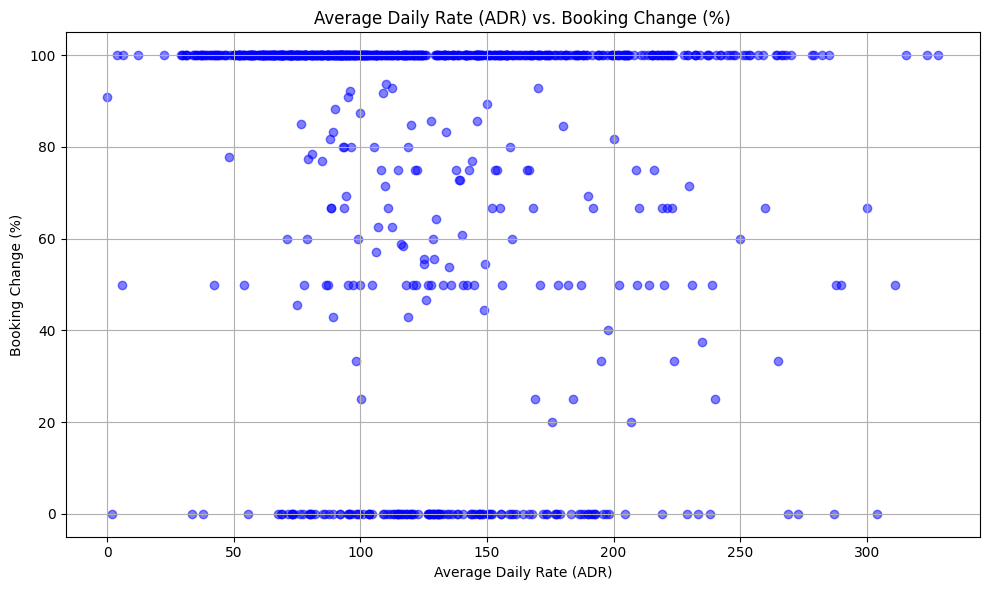

In [ ]:
#task6.2: Impact of Booking Changes on Hotel Operations
# Group by month and year to get the count of bookings
booking_changes = df.groupby(['arrival_date_year', 'arrival_date_month']).agg(
    booking_count=('is_canceled', lambda x: (x == 0).sum())
).reset_index()
# Calculate percentage change in bookings
booking_changes['booking_change_pct'] = booking_changes['booking_count'].pct_change() * 100
# Combine ADR and booking change data
adr_booking_analysis = df.groupby('adr').agg(
    avg_booking_change_pct=('is_canceled', lambda x: (x == 0).sum() / len(x) * 100)  # Booking change in %
).reset_index()
# Scatter plot for ADR vs. booking change percentage
plt.figure(figsize=(10, 6))
plt.scatter(adr_booking_analysis['adr'], adr_booking_analysis['avg_booking_change_pct'], color='blue', alpha=0.5)
plt.title('Average Daily Rate (ADR) vs. Booking Change (%)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Booking Change (%)')
plt.grid()
plt.tight_layout()
plt.show()



In [ ]:
#interpretation:There doesn't appear to be a strong linear relationship between Booking Change (%) and Average Daily Rate (ADR). The data points are scattered across the plot, indicating that changes in ADR might not be strongly correlated with changes in booking volume.

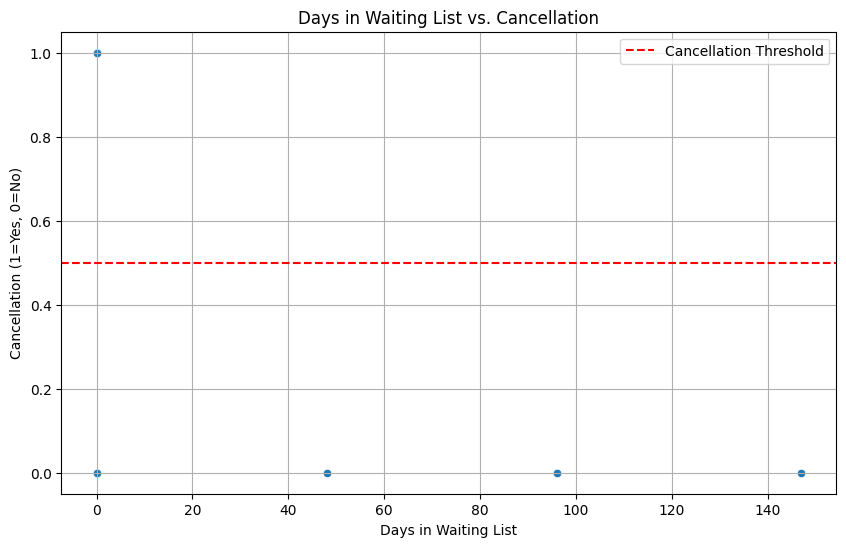

Correlation between days in waiting list and cancellation likelihood: -0.03


In [ ]:
#task6.3:Correlation Between Waiting List Duration and Cancellation Likelihood
# Calculate correlation between days in waiting list and cancellation
correlation = df['days_in_waiting_list'].corr(df['is_canceled'])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_in_waiting_list', y='is_canceled', data=df)
plt.title('Days in Waiting List vs. Cancellation')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation (1=Yes, 0=No)')
plt.axhline(0.5, color='red', linestyle='--', label='Cancellation Threshold')
plt.legend()
plt.grid()
plt.show()

print(f'Correlation between days in waiting list and cancellation likelihood: {correlation:.2f}')

In [ ]:
#interpretation:There doesn't seem to be a clear relationship between the number of Days in Waiting List and the likelihood of Cancellation. The data points are scattered across the plot, indicating that the duration in the waiting list might not be a strong predictor of cancellations.

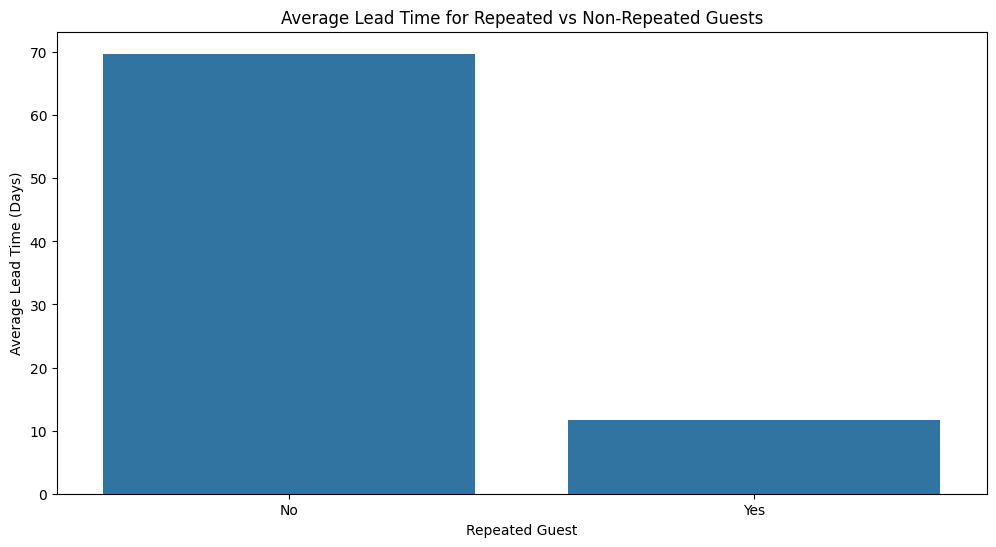

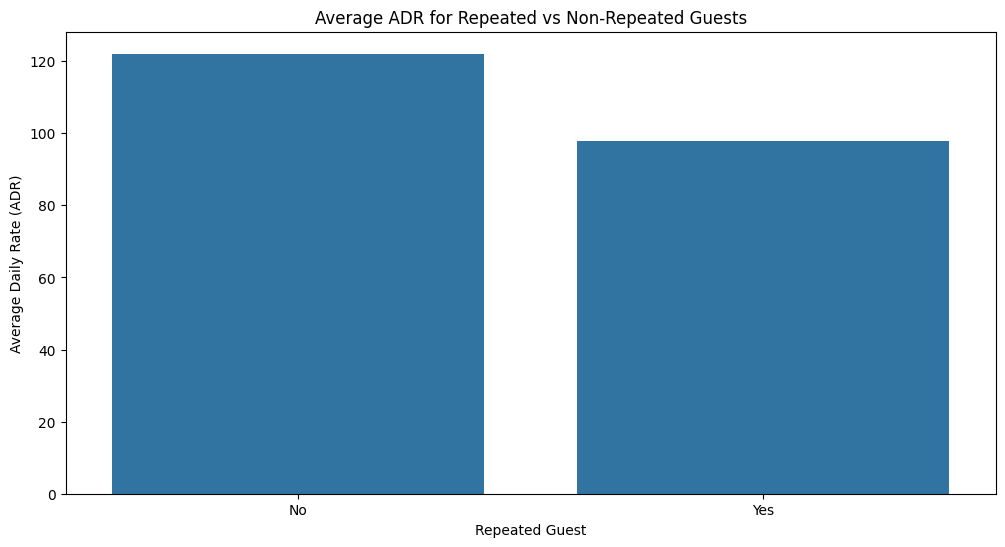

In [ ]:
#task7.1:Behavior of Repeated Guests with Respect to Their Nature of Stay
# Create a DataFrame for repeated vs non-repeated guests
guest_behavior = df.groupby('is_repeated_guest').agg(
    avg_lead_time=('lead_time', 'mean'),
    avg_adr=('adr', 'mean'),
    avg_length_of_stay=('stays_in_week_nights', 'mean')
).reset_index()

# Plotting the behavior of repeated guests
guest_behavior.columns = ['Repeated Guest', 'Average Lead Time', 'Average ADR', 'Average Length of Stay']
guest_behavior['Repeated Guest'] = guest_behavior['Repeated Guest'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(12, 6))
sns.barplot(x='Repeated Guest', y='Average Lead Time', data=guest_behavior)
plt.title('Average Lead Time for Repeated vs Non-Repeated Guests')
plt.ylabel('Average Lead Time (Days)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Repeated Guest', y='Average ADR', data=guest_behavior)
plt.title('Average ADR for Repeated vs Non-Repeated Guests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

In [ ]:
#interpretation:Average ADR for Non-Repeated Guests: The average ADR for guests who have not stayed at the hotel before is significantly higher than for repeated guests. The exact value is not visible in the image, but it appears to be around 120.
#Average ADR for Repeated Guests: The average ADR for repeated guests is lower than for non-repeated guests. The exact value is also not visible, but it appears to be around 100.

Columns in DataFrame: Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'arrival_date', 'hotel_Resort Hotel',
       'deposit_type_Refundable', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party', 'high_risk',
       'month'],
      dtype='object')


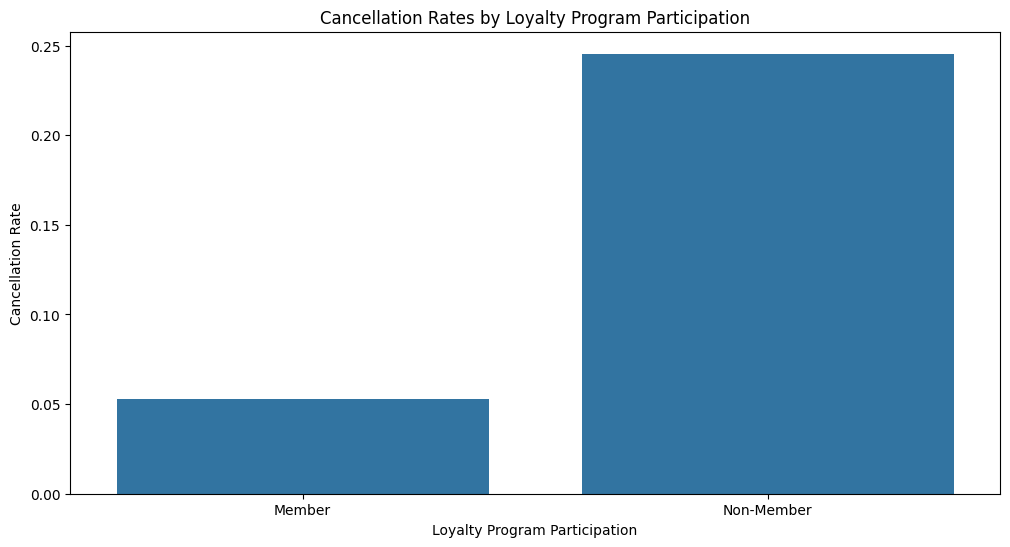

In [ ]:
#task7.2:Success of Loyalty Programs from Customers
print("Columns in DataFrame:", df.columns)
# Create a loyalty program column based on repeated guests
df['loyalty_program'] = df['is_repeated_guest'].apply(lambda x: 'Member' if x == 1 else 'Non-Member')
# Assuming you have a column 'loyalty_program' indicating membership
loyalty_summary = df.groupby('loyalty_program').agg(
    cancellation_rate=('is_canceled', 'mean'),
    avg_adr=('adr', 'mean'),
    total_bookings=('is_canceled', 'count')
).reset_index()

# Plotting loyalty program effectiveness
plt.figure(figsize=(12, 6))
sns.barplot(x='loyalty_program', y='cancellation_rate', data=loyalty_summary)
plt.title('Cancellation Rates by Loyalty Program Participation')
plt.xlabel('Loyalty Program Participation')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
#interpretation:Cancellation Rate for Members: The cancellation rate for members of the loyalty program is significantly lower than for non-members.Cancellation Rate for Non-Members: The cancellation rate for non-members is significantly higher than for members.

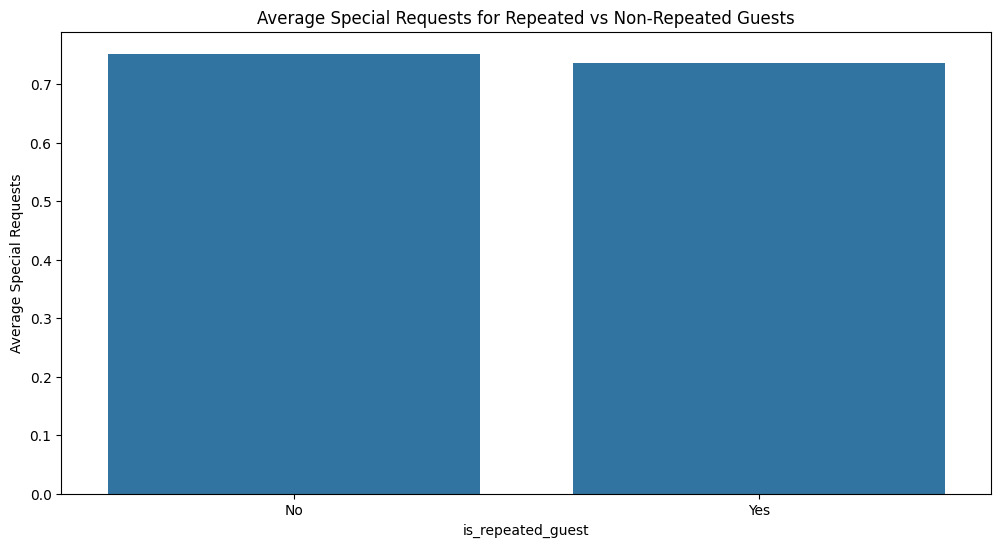

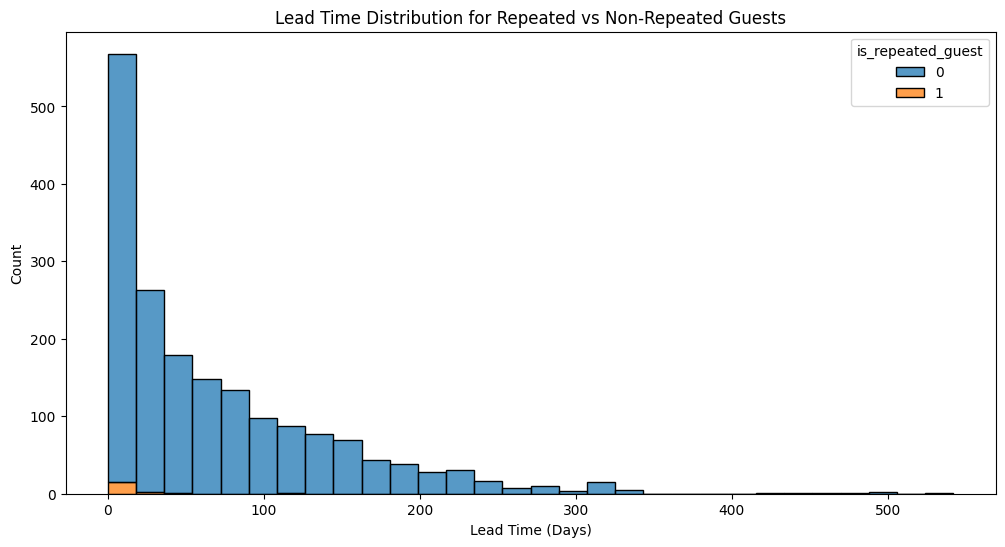

In [ ]:
#task7.3: Factors Contributing to Repeat Business
# Factors analysis
factors_summary = df.groupby('is_repeated_guest').agg(
    avg_special_requests=('total_of_special_requests', 'mean'),
    avg_booking_changes=('booking_changes', 'mean'),
    avg_lead_time=('lead_time', 'mean')
).reset_index()

# Plotting factors
plt.figure(figsize=(12, 6))
sns.barplot(x='is_repeated_guest', y='avg_special_requests', data=factors_summary)
plt.title('Average Special Requests for Repeated vs Non-Repeated Guests')
plt.ylabel('Average Special Requests')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Distribution of lead time for repeated vs non-repeated guests
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lead_time', hue='is_repeated_guest', multiple='stack', bins=30)
plt.title('Lead Time Distribution for Repeated vs Non-Repeated Guests')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Count')
plt.show()

In [ ]:
#interpretation:Cancellation Rate for Members: The cancellation rate for members of the loyalty program is significantly lower than for non-members.Cancellation Rate for Non-Members: The cancellation rate for non-members is significantly higher than for members.
#Both repeated and non-repeated guests exhibit a similar pattern in their lead time distribution.The majority of bookings for both groups are made within the first 100 days.There is a long tail in the distribution, indicating that a small number of bookings are made with much longer lead times.